### Hartree-Fock theory

The first thing we're going to do is go through a derivation of the Hartree-Fock equations, following Szabo and Ostlund. We will then implement three different (basic) types:

- RHF (Restricted Hartree Fock)
- UHF (Unrestricted Hartree Fock)
- ROHF (Restricted Open-Shell Hartree Fock)

We will then follow this algorithm by Head-Gordon (https://doi.org/10.1063/1.476741) to make our code more efficient.


In the single-determinant HF theory, we minimize the energy of a Slater determinant with the contraint that spin-orbitals remain orthogonal.

$$[a|b] = \delta_{ab}$$

Hence we use the following Lagrangian.

$$\mathfrak{L}[\{\chi_a\}] = E_0 [\{\chi_a\}] - \sum_{a=1}^N \sum_{b=1}^N \varepsilon_{ba} ([a|b]-\delta_{ab})$$

$E_0$ is the expectation value of a single determinant $|\Psi_0 \rangle$. Thus we can express its energy as follows.

$$E_0[\{\chi_a\}] = \sum_{a=1}^N [a|h|a] + \frac{1}{2} \sum_{a=1}^N \sum_{b=1}^N [aa|bb] - [ab|ba]$$

Minimizing $E_0$ subject to the constraints (where $\varepsilon_{ba}$ are Lagrange multipliers) is equivalent to minimizing the Lagrangian written above. We vary the spin-orbitals infinitesimally and set the first variation in $\mathfrak{L}$ equal to zero.

$$\chi_a \to \chi_a + \delta \chi_a$$
$$\delta \mathfrak{L} = \delta E_0 - \sum_{a=1}^N \sum_{b=1}^N \varepsilon_{ba} \delta [a|b] = 0$$

Note that $\delta (\delta_{ab}) = 0$. We calculate the variation of each of the terms. We use chemist notation for the two-electron integrals.

$$\delta[a|b] = [\delta \chi_a | \chi_b] + [\chi_a | \delta \chi_b]$$
$$\delta E_0 =\bigg( \sum_{a=1}^N [\delta \chi_a |h | \chi_a ] + \sum_{a=1}^N \sum_{b=1}^N \big( [\delta \chi_a \chi_a | \chi_b \chi_b ] - [\delta \chi_a \chi_b | \chi_b \chi_a ] \big )\bigg) + c.c.$$

Putting everything together,
$$ \delta \mathfrak{L} = \bigg( 
    \sum_{a=1}^N [\delta \chi_a | h | \chi_a] +
    \sum_{a=1}^N \sum_{b=1}^N \big(
        [\delta \chi_a \chi_a | \chi_b \chi_b] - [\delta \chi_a \chi_b | \chi_b \chi_a]
    \big) - \newline
    \sum_{a=1}^N \sum_{b=1}^N \varepsilon_{ba} [\delta \chi_a | \chi_b]
\bigg) + c.c. = 0$$

To obtain the standard formula for the Hartree-Fock equations, we need to define the Coulomb $J$ and Exchange $K$ operators.

$$
J_b (1) = \int d\textbf{x}_2 \space |\chi_b (2)|^2 r_{12}^-1 \Rightarrow \newline
J_b(1) \chi_a (1) = \bigg[\int d\textbf{x}_2 \space \chi_b ^* (2) r_{12}^{-1} \chi_b (2) \bigg] \chi_a (1)
$$

$$K_b (1) \chi_a (1) = \bigg[ \int d\textbf{x}_2 \space \chi_b^* (2) r_{12}^{-1} \chi_a (2) \bigg] \chi_b(1)$$

$$\langle \chi_a (1) | J_b (1) | \chi_a (1)\rangle = [aa|bb]$$
$$\langle \chi_a (1) | K_b (1) | \chi_a (1) \rangle  = [ab|ba] $$

Let's rewrite $\delta \mathfrak{L}$ with this notation.

$$\delta \mathfrak{L} = \bigg(\sum_{a=1}^N [\delta \chi_a | h | \chi_a ] + \sum_{a=1}^N \sum_{b=1}^N \big(\langle \delta \chi_a | J_b (1) | \chi_a (1) \rangle  - \newline \langle \delta \chi_a | K_b (1) | \chi_a (1) \rangle\big) - \sum_{a}^N \sum_{b}^N \varepsilon_{ba} [\delta \chi_a | \chi_b]\bigg) + c.c. = 0$$

$$
\delta \mathfrak{L} = \sum_a \langle \delta \chi_a (1)| 
    \bigg [\bigg(h(1) + \sum_{b=1}^N \big(J_b(1) - K_b (1) 
    
    \big)\bigg) |  \chi_a (1)\rangle \newline - \sum_{b=1}^N \varepsilon_{ba} |\chi_b (1) \rangle \bigg] + c.c. = 0
$$

Since the variation is arbitrary, quantity in brackets must be zero for all $a$. 

So then, $\forall a$,

$$\bigg[

h(1) + \sum_{b=1}^N J_b(1) - K_b (1)
\bigg] |\chi_a (1)\rangle = \sum_{b=1}^N \varepsilon_{ba}| \chi_b (1)\rangle
$$

$\bigg[h(1) + \sum_{b=1}^N J_b(1) - K_b (1) \bigg]$ is the Fock operator $f$.

We can always rotate spin-orbitals amongst themselves without changing $E_0 = \langle \Psi_0 | H | \Psi_0 \rangle$. The operators on the LHS are invariant to unitary transformations of spin-orbitals. We use such a unitary transformation to find the **canonical spin-orbitals** that diagonalize $\boldsymbol{\varepsilon}$ (a Hermitian operator; unitarily diagonalizable). Then,

$$
f|\chi_a \rangle = \varepsilon_a |\chi_a\rangle
$$


When diagonal, $\epsilon_a$ are interpreted as orbital energies;

$$\langle \chi_i | f | \chi_j \rangle = \epsilon_j \langle \chi_i | \chi _j \rangle = \varepsilon_j \delta_{ij}$$

$$\varepsilon_i = \langle \chi_i | f | \chi_i \rangle = 
\langle \chi_i | h + \sum_{b=1}^N (J_b - K_b) | \chi_i \rangle = 
\langle i | h | i \rangle + \sum_{b=1}^N \langle ib || ib \rangle$$

We now introduce a basis (AO basis, normally) to obtain the Roothaan equations.

$$|\chi_i \rangle = \sum_{\mu = 1}^K C_{\mu i} |\phi_\mu\rangle$$

$$f|\chi_i \rangle = f \sum_\nu C_{\nu i} |\phi_\nu \rangle = \varepsilon_i \sum_\nu C_{\nu i} |\phi_\nu\rangle$$

Project onto $\langle \phi_\mu|$.

$$ \sum_\nu C_{\nu i} \langle \phi_\mu | f | \phi _\nu \rangle = \sum_\nu C_{\nu i} \varepsilon_i S_{\mu \nu}$$

$$\sum_\nu F_{\mu \nu } C_{\nu i} = \varepsilon_i \sum_\nu S_{\mu \nu} C_{\nu i} \Rightarrow \textbf{FC} = \textbf{SC}\boldsymbol{\varepsilon}$$

But recall that $\textbf{F}$ depends on the wavefunctions! So really,

$$\textbf{F}^{\{ \textbf{C}\}}\textbf{C} = \textbf{SC}\boldsymbol{\varepsilon}$$

Let's recall how $\textbf{F}$ depends on the wavefunctions.

$$
F_{\mu \nu} = \langle \phi_\mu | f | \phi_\nu \rangle = \newline

\langle \mu | h | \nu \rangle + \sum_{b=1}^N [ \mu \nu | bb ]- [ \mu b | \nu b ]
$$

Here, $b$ are the other spin-orbitals *satisfying the Fock equation.*



But our basis is in the atomic orbitals! Recall that $\textbf{C}$ contains the Fock functions in the AO basis - this is how the Fock operator depends on the wavefunctions themselves.

$$F_{\mu \nu} = H^{\textrm{core}}_{\mu\nu} + \sum_{b=1}^N \sum_{\lambda \sigma} C_{\lambda b} C^*_{\sigma b} [(\mu \nu | \sigma \lambda ) - (\mu \lambda | \sigma \nu)]$$

Here we go from the Fock spin-orbital to the AO *spin-orbital* basis.

In restricted HF, we can use spatial orbitals instead of spin-orbitals. Since $\alpha$ and $\beta$ electrons are equivalent, we also define the density matrix as follows.

$$P_{\lambda \sigma} = 2 \sum_{b}^{N/2} C_{\lambda b} C^*_{\sigma b}$$

$$F^\textrm{RHF}_{\mu \nu} = H^\textrm{core}_{\mu \nu} + \sum_{b=1}^{N/2} \sum_{\lambda \sigma} C_{\lambda b} C^*_{\sigma b} [2(\mu \nu | \sigma \lambda ) - (\mu \lambda | \sigma \nu)] = \newline 
H_{\mu\nu}^\textrm{core} + \sum_{\lambda\sigma} P_{\lambda\sigma}[(\mu\nu|\sigma\lambda) - 0.5(\mu\lambda|\sigma\nu)] \newline = H^\textrm{core}_{\mu\nu} + G_{\mu\nu}$$

Note we now sum over spatial orbitals, not spin-orbitals.



Because our basis is nonorthogonal, we need to orthogonalize it - the way we choose to do this is the symmetric orthogonalization (as opposed to canonical).

We want $\textbf{X}^\dagger \textbf{SX} = \textbf{1}$. First diagonalize $\textbf{S}$.
$$\textbf{U}^\dagger \textbf{SU} = \textbf{s}$$

Choose $\textbf{X} \equiv \textbf{S}^{-1/2} = \textbf{U}\textbf{s}^{-1/2} \textbf{U}^\dagger$.

Define $\textbf{C}' = \textbf{X}^{-1} \textbf{C} \Rightarrow \textbf{C} = \textbf{XC}'$. Substitute this back into the Roothaan equations.

$$\textbf{FXC}' = \textbf{SXC}'\boldsymbol{\varepsilon}$$

Multiply both sides by $\textbf{X}^\dagger$.

$$\textbf{X}^\dagger \textbf{FXC}' = \textbf{X}^\dagger \textbf{SXC}'\boldsymbol{\varepsilon}$$

But $\textbf{X}^\dagger \textbf{SX} = \textbf{1}$, meaning we now have an eigenvalue problem.

$$(\textbf{X}^\dagger \textbf{FX})\textbf{C}' = \textbf{1}\textbf{C}'\boldsymbol{\varepsilon}$$

Defining $\textbf{F}' = \textbf{X}^\dagger \textbf{FX}$,

$$\textbf{F}'\textbf{C}'=\textbf{C}'\boldsymbol{\varepsilon}$$

We can now implement the SCF procedure.



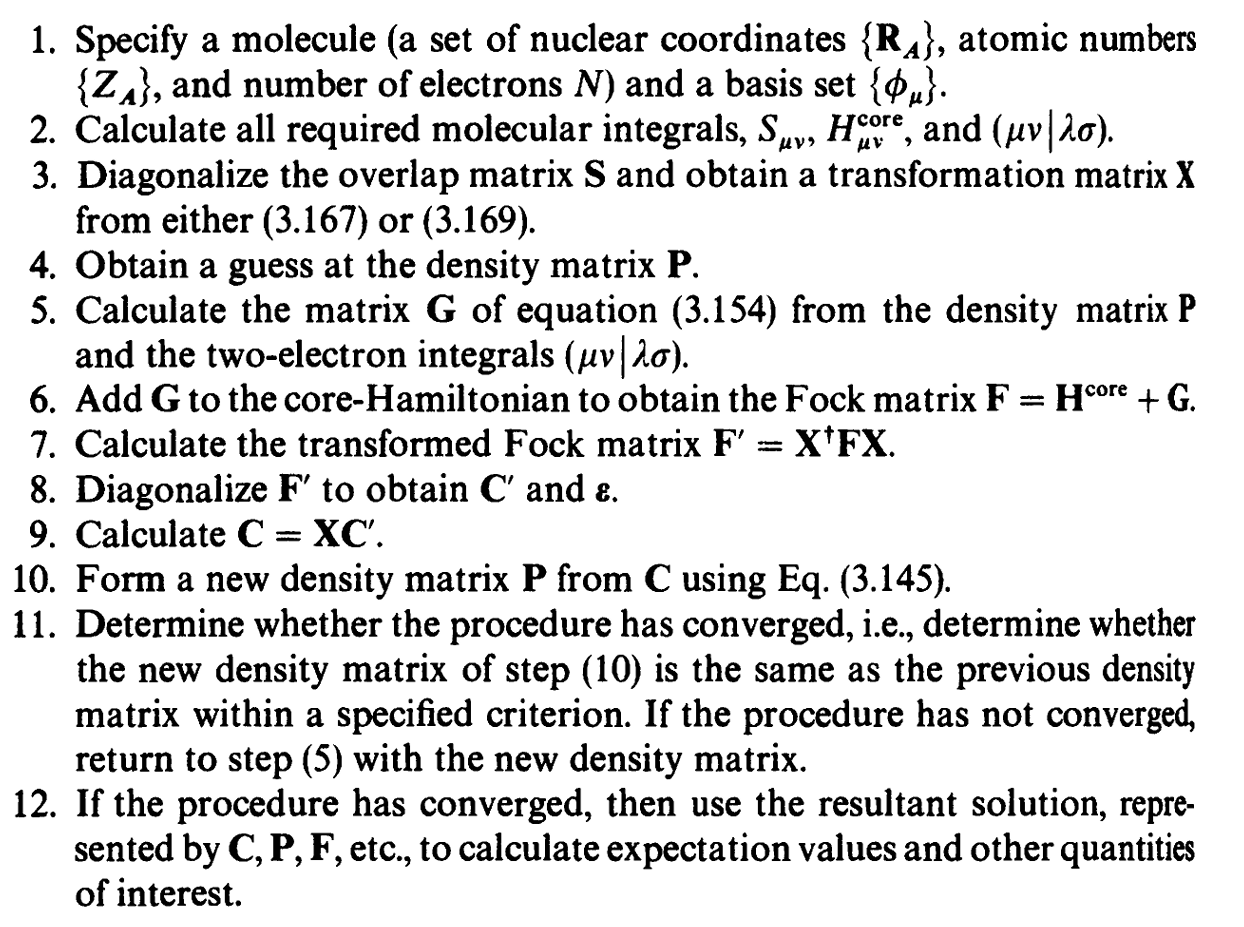

In [72]:
import numpy as np
import scipy as sp
import pyscf
from pyscf import gto

mol = gto.Mole()
mol.atom = """
H    0.0    0.0    0.0
H    1.0    0.0    0.0
H    2.0    0.0    0.0
H    3.0    0.0    0.0
H    4.0    0.0    0.0
H    5.0    0.0    0.0
"""
mol.basis = 'sto-3g'
mol.charge = 0
mol.spin = 0
mol.build()

In [69]:
def restricted_HF(mol, conv_tol = 1e-10):
    """Restricted Hartree-Fock method, following Szabo and Ostlund."""

    n_a = mol.nelec[0]

    T = mol.intor("int1e_kin")
    Vnuc = mol.intor("int1e_nuc")
    hcore = T + Vnuc
    S = mol.intor("int1e_ovlp")
    h2e = mol.intor('int2e', aosym="s1") # most expensive, least intelligent way of doing this.

    conv = 10

    s, U = np.linalg.eigh(S)
    
    s_inv_sqrt = np.diag([x**(-0.5) for x in s])

    X = U @ s_inv_sqrt @ U.conj().T

    F0 = X.T @ hcore @ X
    _, C0 = np.linalg.eigh(F0)
    C = X @ C0
    P = 2 * C[:, :n_a] @ C[:, :n_a].T

    Eprev = None

    while conv > conv_tol:
        
        G = np.einsum('ij,klji->kl',P,h2e) - 0.5 * np.einsum('ij,kijl->kl',P,h2e)
        F = hcore + G

        E0 = 0.5 * np.einsum('ij,ij->',P,hcore+F)

        if Eprev is not None:
            conv = np.abs(E0 - Eprev)

        if conv < conv_tol:
            break
        
        Eprev = E0

        Fp = X.conj().T @ F @ X
        eps, Cp = np.linalg.eigh(Fp)
        C = X @ Cp

        P = 2 * C[:,0:n_a] @ C[:,0:n_a].conj().T

    E0 = E0 + mol.energy_nuc()

    return E0

We are now going to move on to unrestricted Hartree-Fock. In this case, the equations of relevance are the Pople-Nesbet equations.

For those spin-orbitals for alpha electrons, there is both Coulomb and Exchange interaction with the other alpha electrons. But only a Coulomb interaction with the beta electrons. So then,

$$f^{\alpha}(1) = h(1) + \sum_{a}^{N^\alpha} [J_a^{\alpha}(1) - K_a^{\alpha}(1)] + \sum_a^{N^\beta} J_a^\beta (1)$$

$$ f^{\beta} (1) = h(1) + \sum_{a}^{N^\beta} [J_a^\beta (1) - K_a^\beta (1)] + \sum_a^{N^\alpha} J_a^\alpha (1)$$

Imposing a basis where we allow for the alpha and beta orbitals to differ (and therefore have differing alpha and beta density matrices) gives us the following matrix equations.

$$\textbf{F}^\alpha \textbf{C}^\alpha = \textbf{S} \textbf{C}^\alpha \boldsymbol{\varepsilon}^\alpha$$
$$\textbf{F}^\beta \textbf{C}^\beta = \textbf{S} \textbf{C}^\beta \boldsymbol{\varepsilon}^\beta$$

Our density matrices are

$$P^\alpha_{\mu\nu} = \sum_{a}^{N^\alpha} C_{\mu a}^\alpha (C_{\nu a}^\alpha)^*$$
$$P^\beta_{\mu\nu} = \sum_{a}^{N^\beta} C_{\mu a}^\beta (C_{\nu a}^\beta)^*$$

$$\textbf{P}^T = \textbf{P}^\alpha + \textbf{P}^\beta$$
$$\textbf{P}^S = \textbf{P}^\alpha - \textbf{P}^\beta$$

Our Fock matrix elements in the AO basis are

$$F^{\alpha} = \langle \phi_\mu | f^\alpha | \phi_\nu \rangle = \newline
H^\textrm{core}_{\mu\nu} + \sum_a^{N^\alpha} [(\phi_\mu \phi_\nu | \psi_a^\alpha \psi_a^\alpha) - (\phi_\mu \psi_a^\alpha | \psi_a^\alpha \phi_\nu)] + \sum_a^{N^\beta} (\phi_\mu \phi_\nu | \psi_a^\beta \psi_a^\beta)$$

And likewise for $F^\beta$. Then, we can use resolution of identity to substitute the basis expansions of $\psi_a^\alpha$ and $\psi_a^\beta$. Doing so gives us the following.

$$F^\alpha_{\mu\nu} = H_{\mu\nu}^{\textrm{core}} + \sum_{\lambda \sigma} \big(P^T_{\lambda \sigma} (\mu \nu | \sigma \lambda) - P^\alpha_{\lambda \sigma} (\mu \lambda | \sigma \nu)\big)$$

$$F^\beta_{\mu\nu} = H_{\mu\nu}^{\textrm{core}} + \sum_{\lambda \sigma} \big(P^T_{\lambda \sigma} (\mu \nu | \sigma \lambda) - P^\beta_{\lambda \sigma} (\mu \lambda | \sigma \nu)\big)$$

This time,

$$E_0  = \frac{1}{2} \sum_{\mu\nu} [P^T_{\nu\mu} H^\textrm{core}_{\mu\nu} + P^{\alpha}_{\nu\mu} F^\alpha_{\mu\nu} + P^\beta_{\nu\mu} F^\beta_{\mu\nu}]$$

In [78]:
def unrestricted_HF(mol, conv_tol = 1e-10):
    n_a = mol.nelec[0]
    n_b = mol.nelec[1]

    T = mol.intor("int1e_kin")
    Vnuc = mol.intor("int1e_nuc")
    hcore = T + Vnuc
    S = mol.intor("int1e_ovlp")
    h2e = mol.intor('int2e', aosym="s1") # most expensive, least intelligent way of doing this.

    conv = 10

    s, U = np.linalg.eigh(S)
    
    s_inv_sqrt = np.diag([x**(-0.5) for x in s])

    X = U @ s_inv_sqrt @ U.conj().T

    F0 = X.T @ hcore @ X

    # initial guess shall be the density matrix resulting from the core Hamiltonian
    _, C0 = np.linalg.eigh(F0)
    C = X @ C0
    P_a = C[:, :n_a] @ C[:, :n_a].T
    P_b = C[:, :n_b] @ C[:, :n_b].T
    P_t = P_a + P_b

    Eprev = None

    while conv > conv_tol:
        
        F_a = hcore + np.einsum('ij,ijkl->kl',P_t,h2e) - np.einsum('ij,kijl->kl',P_a,h2e)
        F_b = hcore + np.einsum('ij,ijkl->kl',P_t,h2e) - np.einsum('ij,kijl->kl',P_b,h2e)

        E0 = 0.5 * (np.einsum('ij,ji->',P_t,hcore)+np.einsum('ij,ji->',P_a,F_a)+np.einsum('ij,ji->',P_b,F_b))

        if Eprev is not None:
            conv = np.abs(E0 - Eprev)

        if conv < conv_tol:
            break
        
        Eprev = E0

        F_ap = X.conj().T @ F_a @ X
        F_bp = X.conj().T @ F_b @ X

        eps_a, C_ap = np.linalg.eigh(F_ap)
        eps_b, C_bp = np.linalg.eigh(F_bp)

        C_a = X @ C_ap
        C_b = X @ C_bp

        P_a = C_a[:,0:n_a] @ C_a[:,0:n_a].conj().T
        P_b = C_b[:,0:n_b] @ C_b[:,0:n_b].conj().T
        P_t = P_a + P_b


    E0 = E0 + mol.energy_nuc() 

    return E0

In [ ]:
import numpy as np
import scipy as sp
import pyscf
from pyscf import gto

mol = gto.Mole()
mol.atom = """
H    0.0    0.0    0.0
H    1.0    0.0    0.0
H    2.0    0.0    0.0
H    3.0    0.0    0.0
H    4.0    0.0    0.0
H    5.0    0.0    0.0
"""
mol.basis = 'sto-3g'
mol.charge = -1
mol.spin = 1
mol.build()

print(mol.nelec)

(4, 3)


In [79]:
unrestricted_HF(mol)

-2.931413388667613

In [77]:
from pyscf import scf

mf = scf.UHF(mol)
mf.kernel()

converged SCF energy = -2.93141338872476  <S^2> = 0.79898321  2S+1 = 2.0483976


-2.931413388724758

We now move on to discuss ROHF. This theory is absent from Szabo and Ostlund. However, it is present in **Introduction to the Electron Theory of Small Molecules** by Hurley, which is the reference we will be following for this section.

The main issue in UHF is that the Fock operators for alpha and beta electrons contain different exchange contributions - which is why the orbitals for the two end up differing. As a consequence, the UHF determinants are not total-spin eigenfunctions.

**Nesbet's approximation** was that in many cases, the effect of the exchange operators is small, and a satisfactory approximation can be obtained by solving just one of the sets, and then using the solutions for both the alpha and beta orbitals. But we can do better.

We impose the restriction that $\phi_i^\alpha = \phi_i^\beta$ from the beginning. $|\Psi \rangle = |\phi_1 \bar{\phi}_1 ... \phi_p \bar{\phi}_p \phi_{p+1}...\phi_{p+q}|$. The expectation energy is required to be stationary for variations of orbitals, with the constraint that the orbitals are orthonormal.

$$(\phi_i |\phi_j) = \delta_{ij}$$

$$\Rightarrow \delta \bigg\{ E - \sum_{i=1}^{p+q} \sum_{j=q}^{p+q} 
2\epsilon_{ij} (\phi_i | \phi_j)
\bigg\} = 0$$

Let's expand $E$.

$$E = 2 \sum_{i=1}^{p} h_i + \sum_{i=p+1}^{p+q} h_i + \sum_{i=1}^p \sum_{j=1}^p (2J_{ij} - K_{ij}) \newline + \sum_{i=1}^p \sum_{j=p+q}^{p+q} (2J_{ij} - K_{ij}) +\frac{1}{2} \sum_{i=p+q}^{p+q} \sum_{j=p+1}^{p+q} (J_{ij} - K_{ij})

It seems that there are different ways that people calculate ROHF. https://pubs.acs.org/doi/pdf/10.1021/jp101758y?ref=article_openPDF

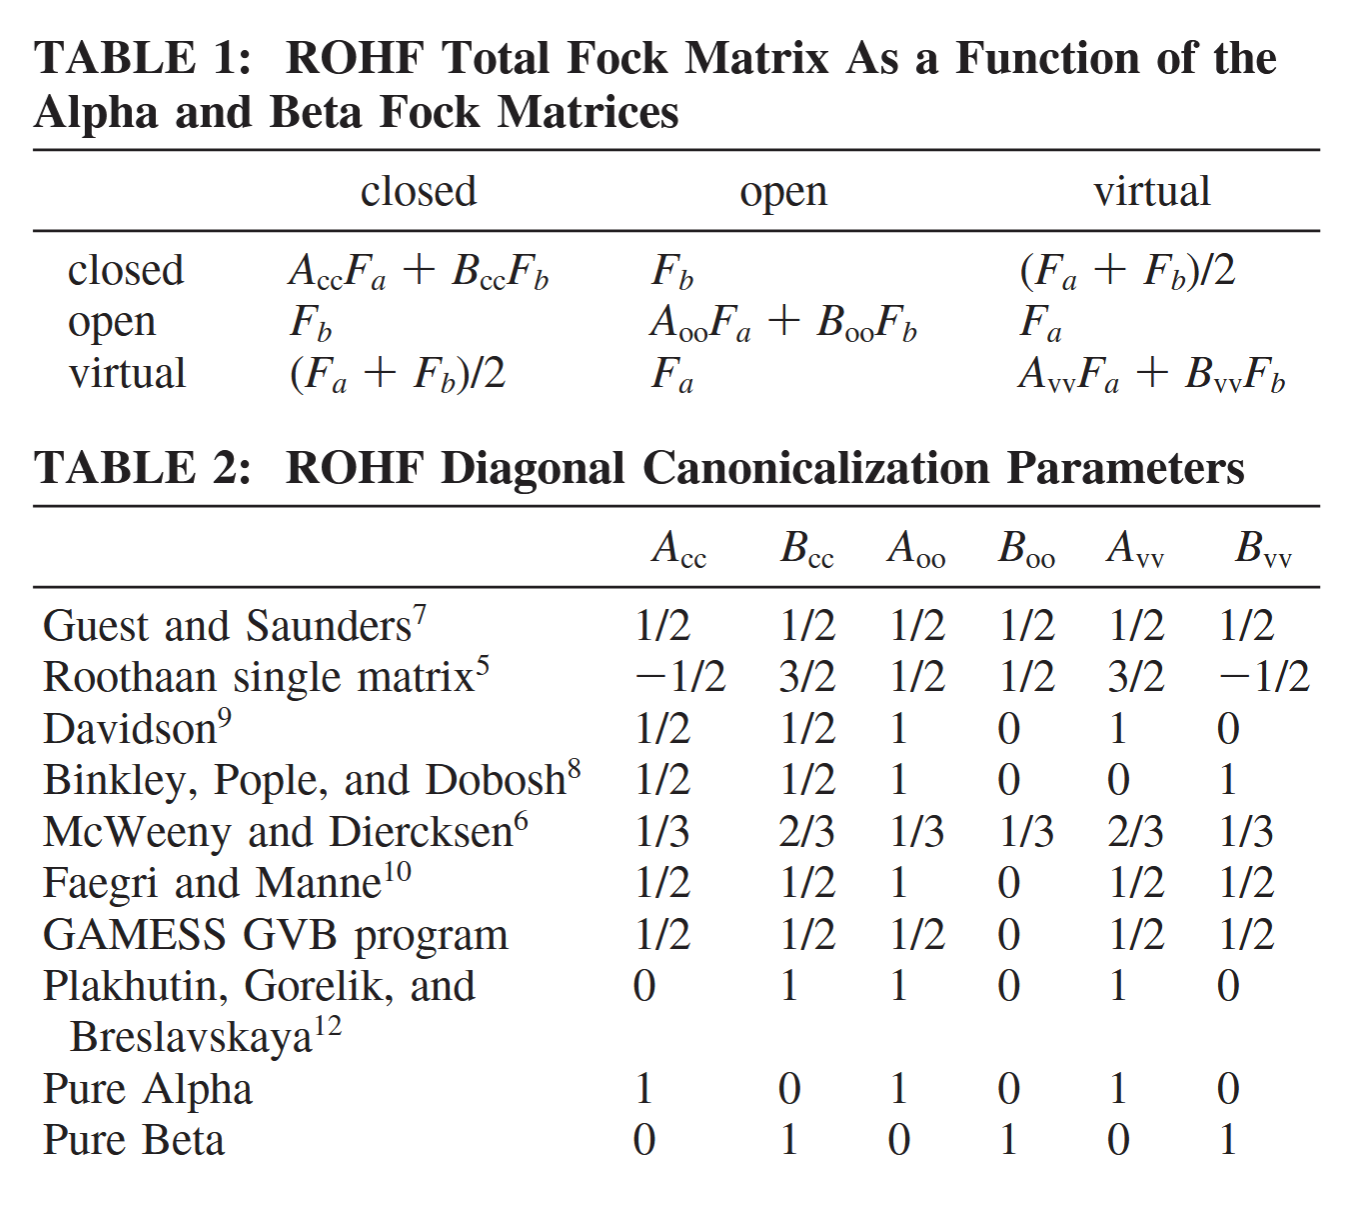

From https://hal.science/hal-03228618/document:

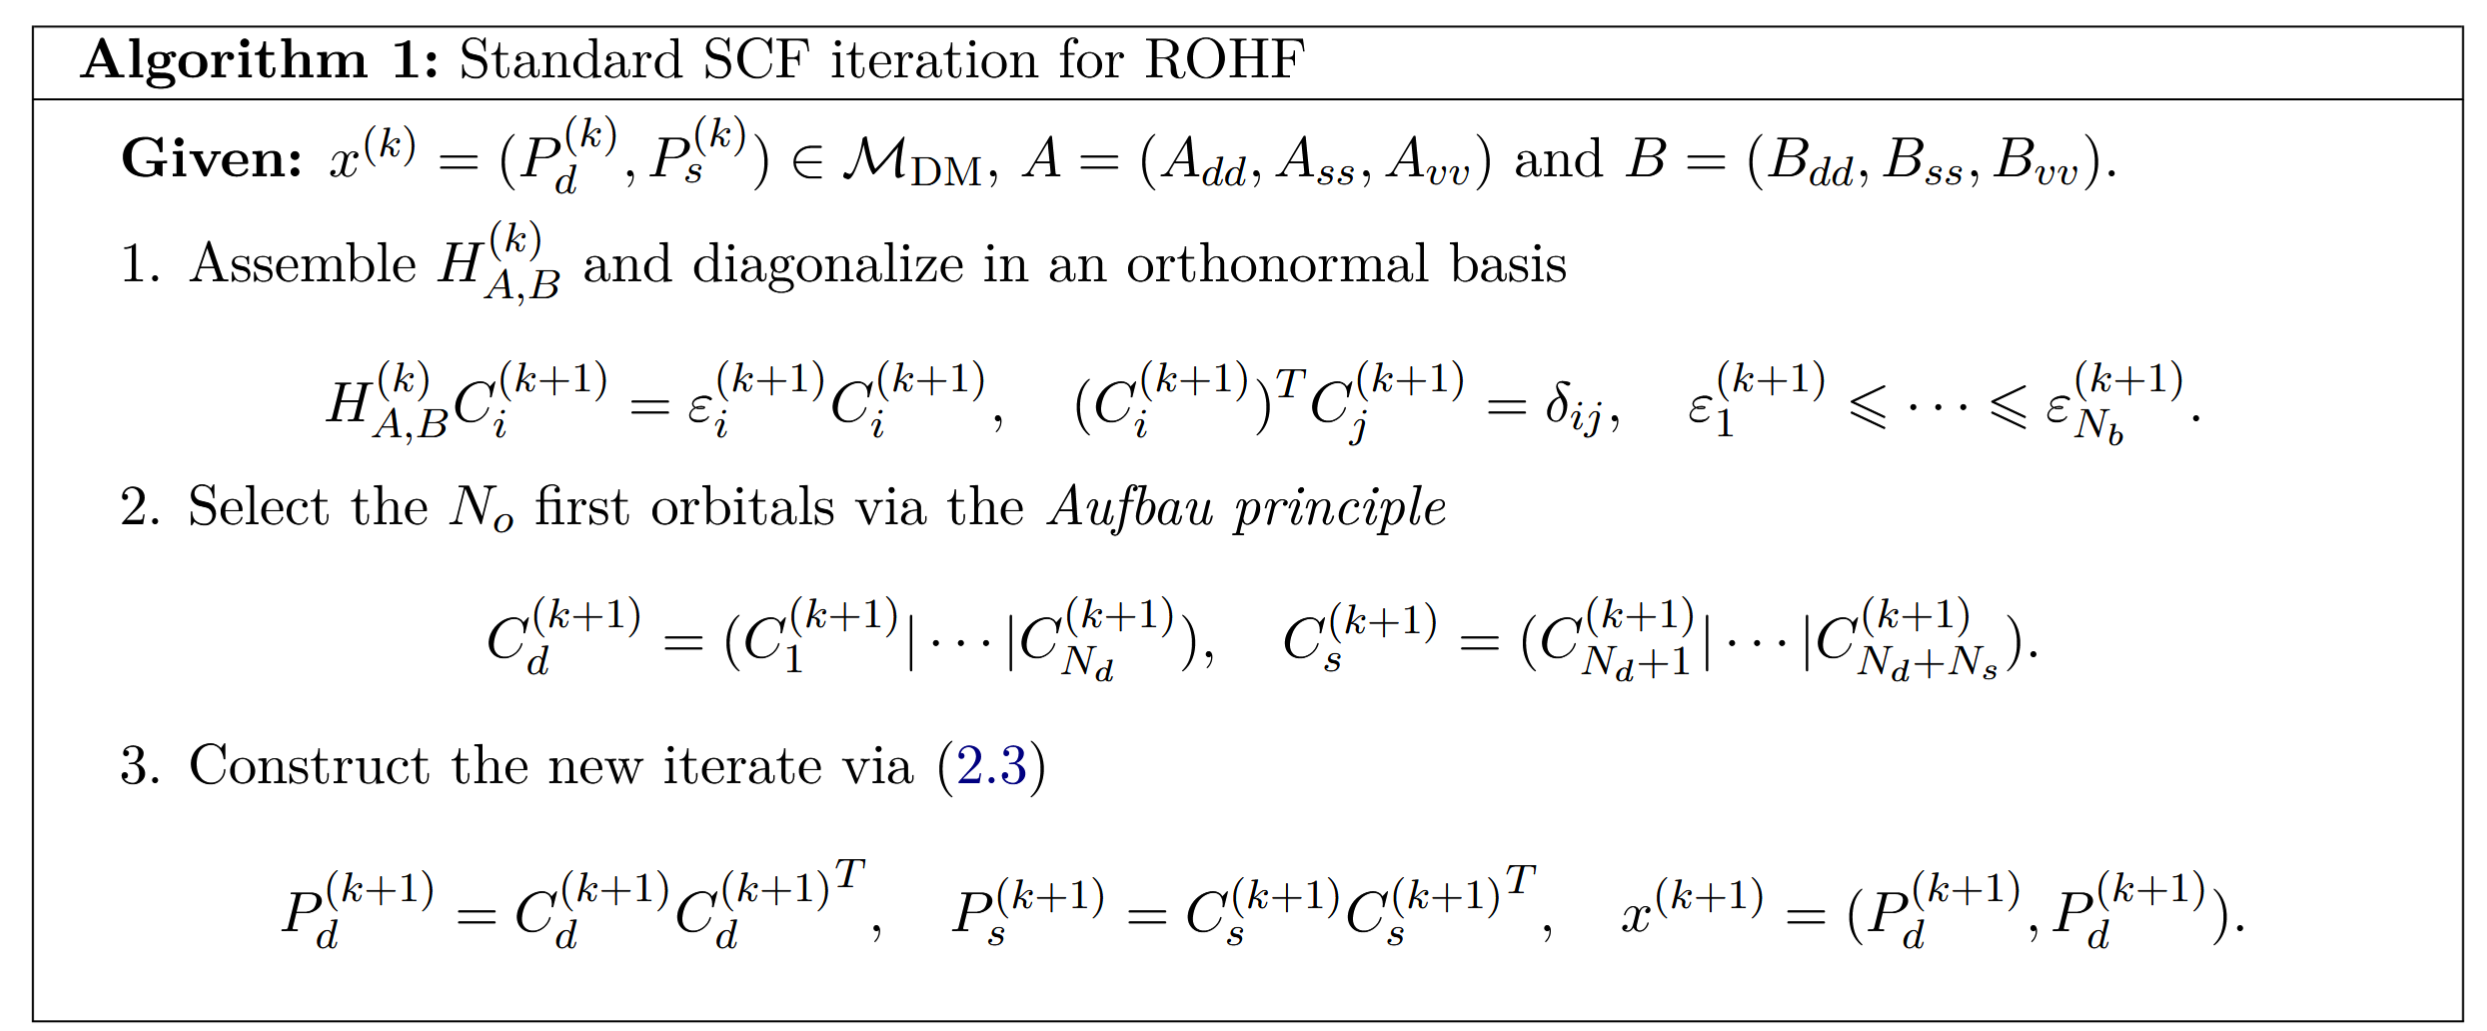

I don't really understand why there are so many different ways to construct the effective Fock matrix - and it seems that Roothaan's original derivation has a few "angular momentum" arguments for certain parameter choices. But I don't really understand, so I'm not going to delve any more into this.

In [ ]:
def restricted_openShell_HF(mol, conv_tol = 1e-12):
    n_a = mol.nelec[0]
    n_b = mol.nelec[1]

    T = mol.intor("int1e_kin")
    Vnuc = mol.intor("int1e_nuc")
    hcore = T + Vnuc
    S = mol.intor("int1e_ovlp")
    h2e = mol.intor('int2e', aosym="s1") # most expensive, least intelligent way of doing this.


    conv = 10

    s, U = np.linalg.eigh(S)
    
    s_inv_sqrt = np.diag([x**(-0.5) for x in s])

    X = U @ s_inv_sqrt @ U.conj().T

    F0 = X.T @ hcore @ X

    n_orb = np.shape(F0)[0]

    # initial guess shall be the density matrix resulting from the core Hamiltonian
    _, C0 = np.linalg.eigh(F0)
    C = X @ C0
    P_a = C[:, :n_a] @ C[:, :n_a].T
    P_b = C[:, :n_b] @ C[:, :n_b].T
    P_t = P_a + P_b

    Eprev = None

    c = slice(0,n_b)
    o = slice(n_b,n_a)
    v = slice(n_a,n_orb)

    while conv > conv_tol:
        
        F_a = hcore + np.einsum('ij,ijkl->kl',P_t,h2e) - np.einsum('ij,kijl->kl',P_a,h2e)
        F_b = hcore + np.einsum('ij,ijkl->kl',P_t,h2e) - np.einsum('ij,kijl->kl',P_b,h2e)

        E0 = 0.5 * (np.einsum('ij,ji->',P_t,hcore)+np.einsum('ij,ji->',P_a,F_a)+np.einsum('ij,ji->',P_b,F_b))

        if Eprev is not None:
            conv = np.abs(E0 - Eprev)

        if conv < conv_tol:
            break
        
        Eprev = E0

        F_ap = X.conj().T @ F_a @ X
        F_bp = X.conj().T @ F_b @ X

        # core 
        F_tp = 0.5 * (F_ap + F_bp)

        F_effp = np.zeros_like(F_ap)

        F_effp[c,c] = 0.5 * (F_ap[c,c] + F_bp[c,c])
        F_effp[o,o] = 0.5 * (F_ap[o,o] + F_bp[o,o])
        # F_effp[o,o] = F_ap[o,o] # Davidson scheme
        F_effp[v,v] = 0.5 * (F_ap[v,v] + F_bp[v,v])
        # F_effp[v,v] = F_ap[v,v] # Davidson scheme
        F_effp[c,v] = F_tp[c,v]
        F_effp[v,c] = F_tp[v,c]
        F_effp[c,o] = F_bp[c,o]
        F_effp[o,c] = F_bp[o,c]
        F_effp[o,v] = F_ap[o,v]
        F_effp[v,o] = F_ap[v,o]
        
        eps, C_p = np.linalg.eigh(F_effp)

        C = X @ C_p

        P_a = C[:,0:n_a] @ C[:,0:n_a].conj().T
        P_b = C[:,0:n_b] @ C[:,0:n_b].conj().T
        P_t = P_a + P_b


    E0 = E0 + mol.energy_nuc() 

    return E0

In [81]:
import numpy as np
import scipy as sp
import pyscf
from pyscf import gto

mol = gto.Mole()
mol.atom = """
H    0.0    0.0    0.0
H    1.0    0.0    0.0
H    2.0    0.0    0.0
H    3.0    0.0    0.0
H    4.0    0.0    0.0
H    5.0    0.0    0.0
"""
mol.basis = 'sto-3g'
mol.charge = -1
mol.spin = 1
mol.build()

print(mol.nelec)

(4, 3)


In [98]:
from pyscf import scf

mf = scf.ROHF(mol)
mf.kernel()
restricted_openShell_HF(mol)

# My method and the one implemented in PySCF do different things. I don't really know why - TODO.


converged SCF energy = -2.91998129971585


-2.918254071895337

Now we're gonna follow this tutorial: https://www.chem.fsu.edu/~deprince/programming_projects/diis/

We're going to implement DIIS (direct inversion of the iterative subspace). Originally invented by Pulay: https://doi.org/10.1002%2Fjcc.540030413

The parameter we will extrapolate is the Fock matrix in the orthonormal basis.

$$\bar{\textbf{F}}' = \sum_i c_i \textbf{F}_i'$$

Coefficients $c_i$ chosen so that error associated with extrapolated Fock matrix tends to zero;

$$\bar{\textbf{e}} = \sum_i c_i \textbf{e}_i \approx 0$$

The error vector suggested by Pulay was the commutator of the Fock and density matrices.

$$\textbf{F}_i \textbf{D}_i \textbf{S} - \textbf{S} \textbf{D}_i \textbf{F}_i$$

In orthonormal basis obtained via symmetric orthogonalization,

$$\textbf{e}_i = (\textbf{S}^{-1/2})^T [\textbf{F}_i \textbf{D}_i \textbf{S} - \textbf{S} \textbf{D}_i \textbf{F}_i] \textbf{S}^{-1/2}$$

To determine the coefficients $c_i$, we want to minimize the norm of the error vector.

$$|\bar{\textbf{e}}|^2 = \sum_{ij} c_i c_j \textbf{e}_i \textbf{e}_j$$

Constrained optimization with the constraint that $\sum_i c_i = 1$:

$$\mathfrak{L} = \sum_{ij} c_i c_j B_{ij} - 2\lambda \bigg(\sum_i c_i -1 \bigg)$$

Here, $B_{ij} = \textbf{e}_i \cdot \textbf{e}_j$. Matrix norm is used; I think the idea is that one reshapes the Fock error matrix into a vector, and then dots it with previous. When constructing $B_{ij}$, you don't need to rebuild the whole thing each time, because in reality you're just adding a row and column to your $B_{ij}$ matrix. 

**TODO: Derive and make a picture.**



In [4]:
def restricted_HF_convE_and_DM(mol, conv_tol = 1e-10):
    """Restricted Hartree-Fock method, following Szabo and Ostlund.
    """

    n_a = mol.nelec[0]

    T = mol.intor("int1e_kin")
    Vnuc = mol.intor("int1e_nuc")
    hcore = T + Vnuc
    S = mol.intor("int1e_ovlp")
    h2e = mol.intor('int2e', aosym="s1") # most expensive, least intelligent way of doing this.

    convE = 10
    convDM = 10

    # we now implement checking convergence of both density matrix as well as energy.

    s, U = np.linalg.eigh(S)
    
    s_inv_sqrt = np.diag([x**(-0.5) for x in s])

    X = U @ s_inv_sqrt @ U.conj().T

    F0 = X.T @ hcore @ X
    _, C0 = np.linalg.eigh(F0)
    C = X @ C0
    P = 2 * C[:, :n_a] @ C[:, :n_a].T

    Eprev = None

    while convE > conv_tol or convDM > conv_tol:
        
        G = np.einsum('ij,klji->kl',P,h2e) - 0.5 * np.einsum('ij,kijl->kl',P,h2e)
        F = hcore + G

        E0 = 0.5 * np.einsum('ij,ij->',P,hcore+F)

        if Eprev is not None:
            convE = np.abs(E0 - Eprev)

        if convE < conv_tol and convDM < conv_tol:
            break
        
        Eprev = E0

        Fp = X.conj().T @ F @ X
        eps, Cp = np.linalg.eigh(Fp)
        C = X @ Cp

        Pnew = 2 * C[:,0:n_a] @ C[:,0:n_a].conj().T
        convDM = np.linalg.norm(Pnew-P)
        P = Pnew

    E0 = E0 + mol.energy_nuc()

    return E0, P



In [3]:
import numpy as np
import scipy as sp
import pyscf
from pyscf import gto, scf

mol = gto.Mole()
mol.atom = """
H    0.0    0.0    0.0
H    1.0    0.0    0.0
H    2.0    0.0    0.0
H    3.0    0.0    0.0
H    4.0    0.0    0.0
H    5.0    0.0    0.0
"""
mol.basis = 'sto-3g'
mol.charge = 0
mol.spin = 0
mol.build()

mf = scf.RHF(mol)
print(mf.kernel())
print(restricted_HF_convE_and_DM(mol)[0])

converged SCF energy = -3.13553221396632
-3.1355322139663224
-3.135532213966319


In [ ]:
def restricted_HF_withDIIS(mol, conv_tol = 1e-10, ndiis = 3):
    """Restricted Hartree-Fock method, following Szabo and Ostlund.
    DIIS implemented.
    """

    n_a = mol.nelec[0]

    T = mol.intor("int1e_kin")
    Vnuc = mol.intor("int1e_nuc")
    hcore = T + Vnuc
    S = mol.intor("int1e_ovlp")
    h2e = mol.intor('int2e', aosym="s1") # most expensive, least intelligent way of doing this.

    convE = 10
    convDM = 10

    # we now implement checking convergence of both density matrix as well as energy.

    s, U = np.linalg.eigh(S)
    
    s_inv_sqrt = np.diag([x**(-0.5) for x in s])

    X = U @ s_inv_sqrt @ U.conj().T

    F0 = X.T @ hcore @ X
    _, C0 = np.linalg.eigh(F0)
    C = X @ C0
    P = 2 * C[:, :n_a] @ C[:, :n_a].T

    Eprev = None

    niter = 0

    errors = []
    focks = []

    while convE > conv_tol or convDM > conv_tol:
        
        niter += 1

        G = np.einsum('ij,klji->kl',P,h2e) - 0.5 * np.einsum('ij,kijl->kl',P,h2e)
        F = hcore + G
        focks.append(F)

        e_i = X.T @ (F @ P @ S - S @ P @ F) @ X
        errors.append(e_i)

        E0 = 0.5 * np.einsum('ij,ij->',P,hcore+F)

        if Eprev is not None:
            convE = np.abs(E0 - Eprev)

        if convE < conv_tol and convDM < conv_tol:
            break
        
        if niter % ndiis == 0:
            #  construct B matrix
            Bmatrix = np.full((ndiis+1,ndiis+1),-1.0)
            zerovec = np.zeros((ndiis+1,1), dtype = np.double)
            zerovec[ndiis][0] = -1.0

            for i in range(ndiis):
                for j in range(i, ndiis):

                    Bmatrix[i,j] =  np.linalg.norm(errors[i] @ errors[j].conj().T)

                    if not j == i:
                        Bmatrix[j][i] = Bmatrix[i][j].conj()
                        
            Bmatrix[ndiis][ndiis] = 0
            # print(Bmatrix)

            try:
                coeff_vec = np.linalg.solve(Bmatrix, zerovec)
                trunc_coeff = coeff_vec[:-1,:]
                # print(trunc_coeff)
                trunc_coeff = np.reshape(trunc_coeff, (ndiis,))
                F = np.einsum('i,ijk->jk', trunc_coeff, focks)
            except:
                print("singular")
            errors = []
            focks = []

        Eprev = E0

        Fp = X.conj().T @ F @ X
        eps, Cp = np.linalg.eigh(Fp)
        C = X @ Cp

        Pnew = 2 * C[:,0:n_a] @ C[:,0:n_a].conj().T
        convDM = np.linalg.norm(Pnew-P)
        P = Pnew

    E0 = E0 + mol.energy_nuc()

    return E0, P, errors


In [86]:
E0, P, errors = restricted_HF_withDIIS(mol)

In [87]:
print(E0)

-3.135532213966317


In [90]:
mf = scf.RHF(mol)
mf.kernel()

converged SCF energy = -3.13553221396632


-3.1355322139663224